# Time Series Analysis: Cryptocurrencies

In this project we will be performing a simple time series analysis of the major cryptocurrencies currently around. As with most if not all applications of Python in financial analysis, we will be using pandas to store and manipulate our dataframes and matplotlib as our graphing tool.

First we will want to pull out the data (in CSV form) of 15 current major cryptocurrencies. The data can be pulled from database websites like Kaggle.com (link below): 

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/data

Note that while working on the Python script, make sure that it is saved in the same directory as the CSV files so that there will be no error when loading.

Now we import our required libraries.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

Next, looking at the collection of data we just downloaded, we can see that most of the ones we require are named "{name}_price.csv", so we will create a function that parses through these CSV files and reads them.

In [2]:
def read_csvfile(name):
    file_path = f'{name}_price.csv' # Following the file naming convention
    return pd.read_csv(file_path, parse_dates = True, index_col = 'Date') # Using the date as the index column

For iteration purposes, we will store the names of the major cryptocurrencies in a Python list. After that, we will iterate through the list of names, read all the CSV files associated with each name, and store them in a variable. Essentially, we are creating a list of lists.

In [4]:
dataset_to_read = ['bitcoin', 'bitcoin_cash', 'dash', 'ethereum_classic',
                     'bitconnect', 'litecoin', 'monero', 'nem',
                     'neo', 'numeraire', 'omisego',
                     'qtum', 'ripple', 'stratis', 'waves']

cryptos = [read_csvfile(currency) for currency in dataset_to_read]

Now, we will create variables that stores each list within the "cryptos" list using the index number in which they are stored. The name of each variable corresponds to the cryptocurrency list that we are talking about.

Finally, we will store these list of lists inside another variable called "dataset", which is ready for manipulation and graphing.

In [6]:
bitcoin = cryptos[0]
bitcoin_cash = cryptos[1]
dash = cryptos[2]
ethereum_classic = cryptos[3]
bitconnect = cryptos[4]
litecoin = cryptos[5]
monero = cryptos[6]
nem = cryptos[7]
neo = cryptos[8]
numeraire = cryptos[9]
omisego = cryptos[10]
qtum = cryptos[11]
ripple = cryptos[12]
stratis = cryptos[13]
waves = cryptos[14]

dataset = [bitcoin, bitcoin_cash, dash,
           ethereum_classic, bitconnect,
           litecoin, monero, nem, neo,
           numeraire, omisego, qtum,
           ripple,stratis, waves]

Next, we will create new columns in each list inside the "dataset" variable. We will do this by adding the columns within a for-loop. The new columns that we want include:
- 30-day moving average 
- 50-day moving average 
- 100-day moving average
- 30-day rolling volatility (standard deviation)

Finally, in order to avoid having N/A values within rows that are < 30 days, we will set the min_periods = 0

In [10]:
for item in dataset:
    item.sort_index(inplace=True)
    item['30_day_mean'] = item['Close'].rolling(window=30, min_periods = 0).mean()
    item['50_day_mean'] = item['Close'].rolling(window=50, min_periods = 0).mean()
    item['100_day_mean'] = item['Close'].rolling(window=100, min_periods = 0).mean()
    item['30_day_volatility'] = item['Close'].rolling(window=30, min_periods = 0).std()

# Let's check the final data in one of them

bitcoin.head()

,Open,High,Low,Close,Volume,Market Cap,30_day_mean,50_day_mean,100_day_mean,30_day_volatility
Date,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",134.210,134.210,134.210,NaN
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",139.375,139.375,139.375,7.304413
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",139.250,139.250,139.250,5.169536
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",133.685,133.685,133.685,11.903485
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",127.990,127.990,127.990,16.383982


Finally, we will graph each major cryptocurrency using matplotlib. For the purpose of conciseness (and writing good code), we will also use a for-loop to iterate through the dataset. What we are graphing includes:
- Closing Price 
- 30-day moving average 
- 50-day moving average 
- 100-day moving average 
- 30-day volatility

Basically, aside from the closing price, the ones we graph are the columns we feature-engineered ourselves. 

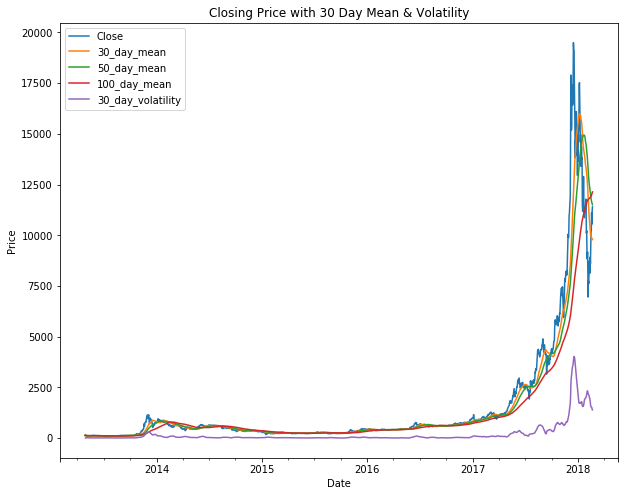

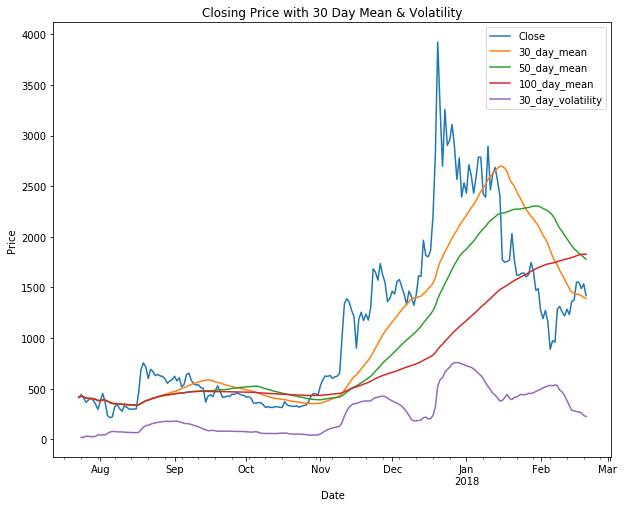

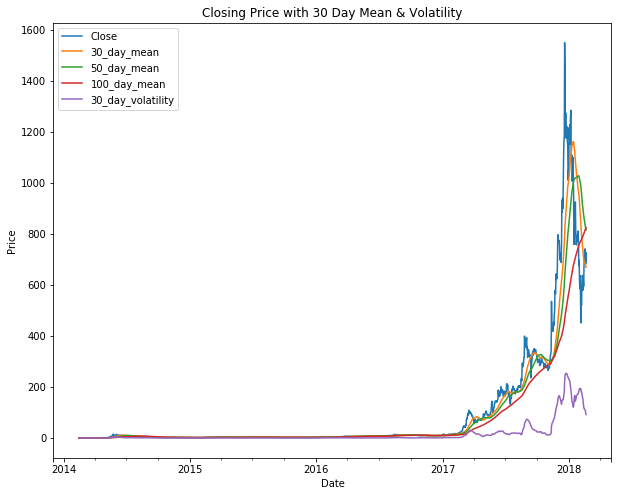

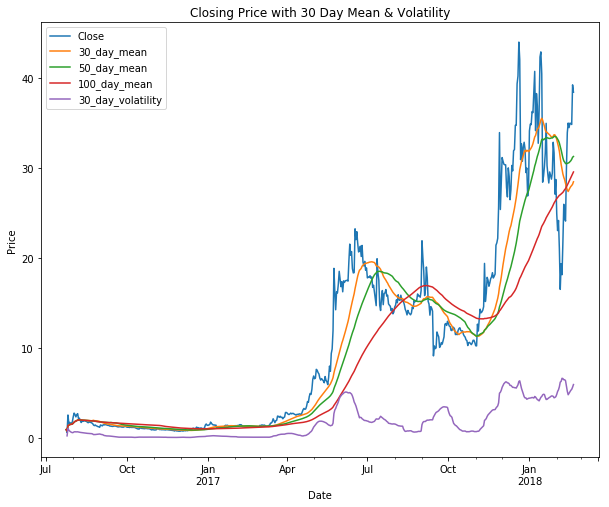

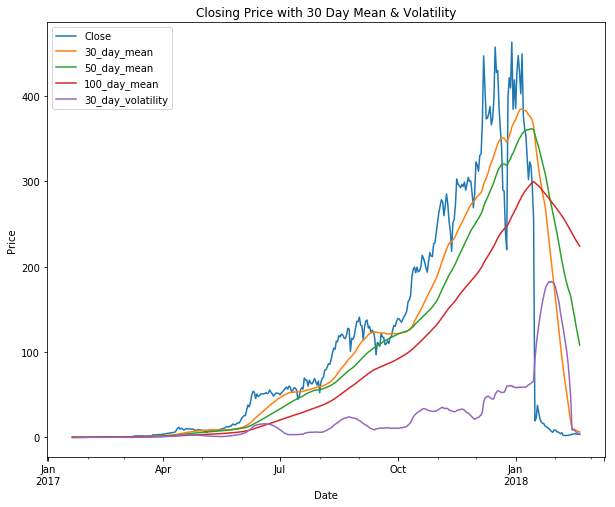

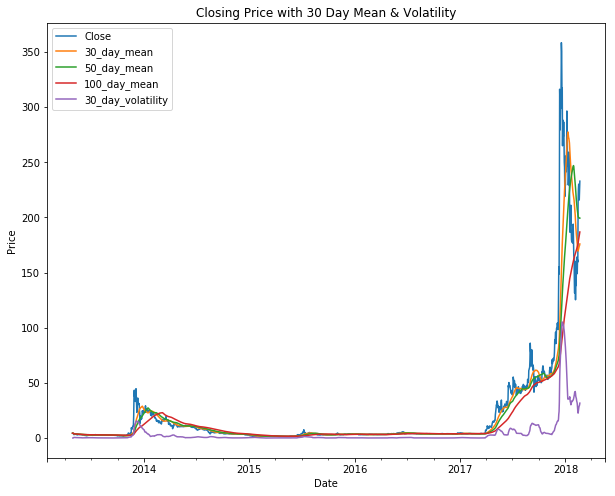

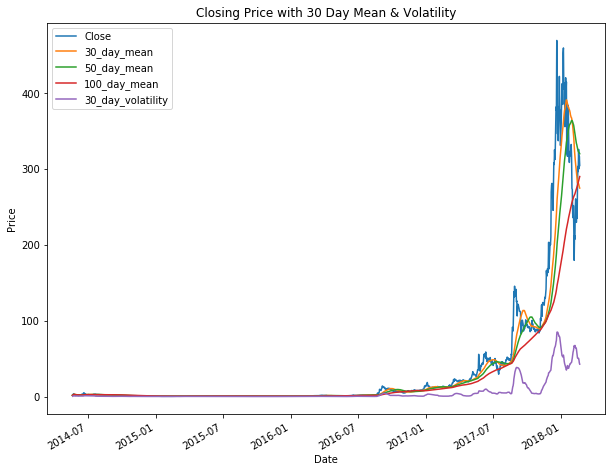

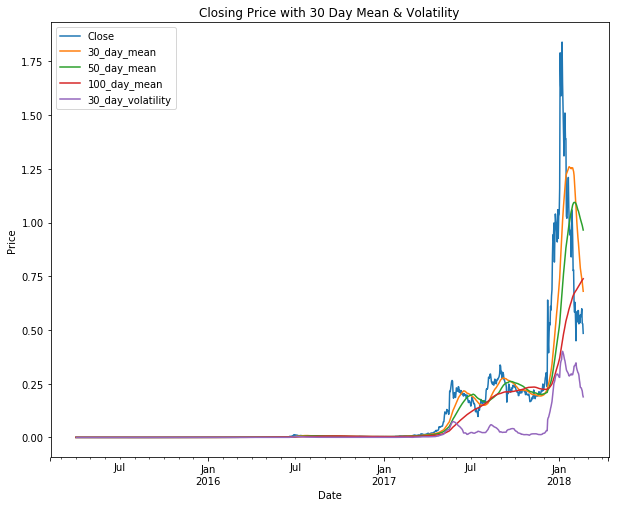

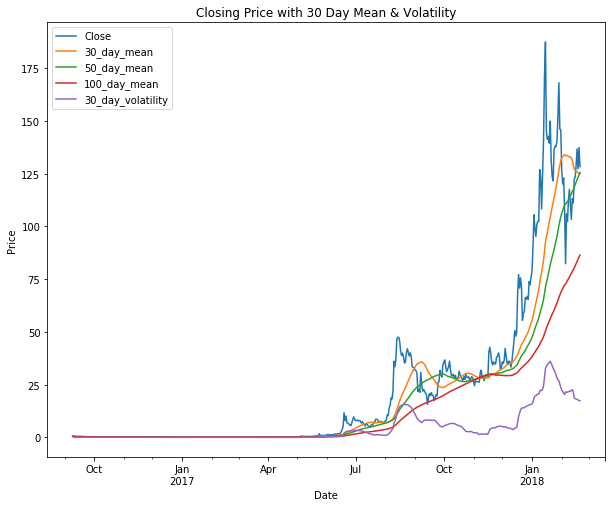

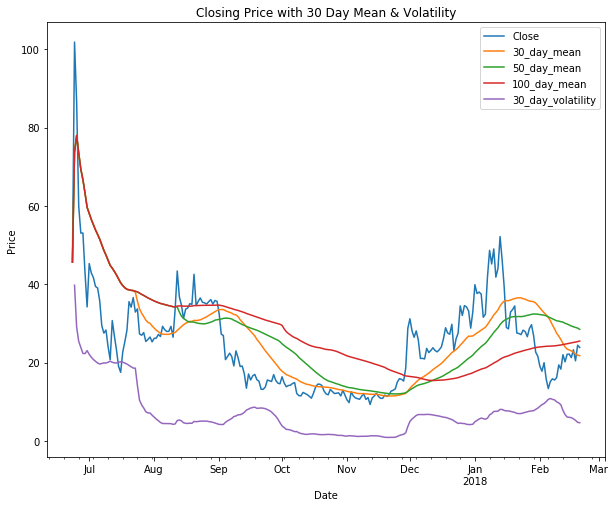

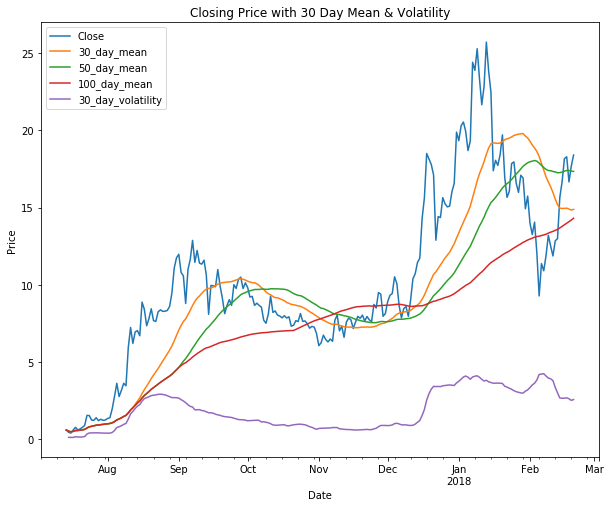

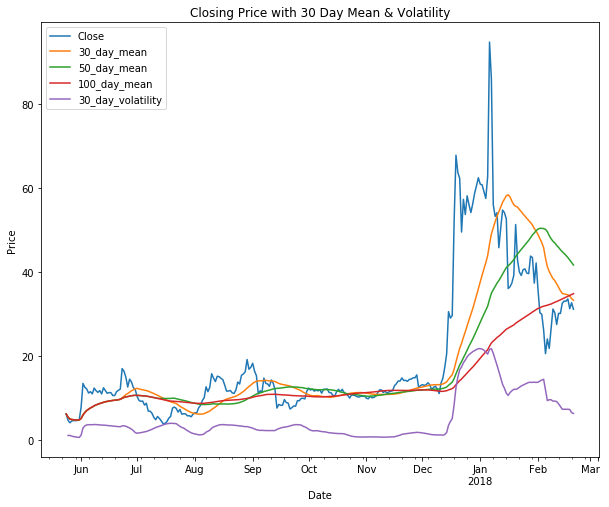

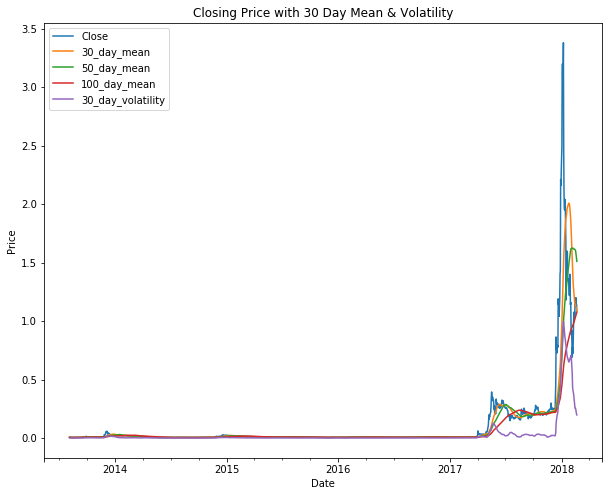

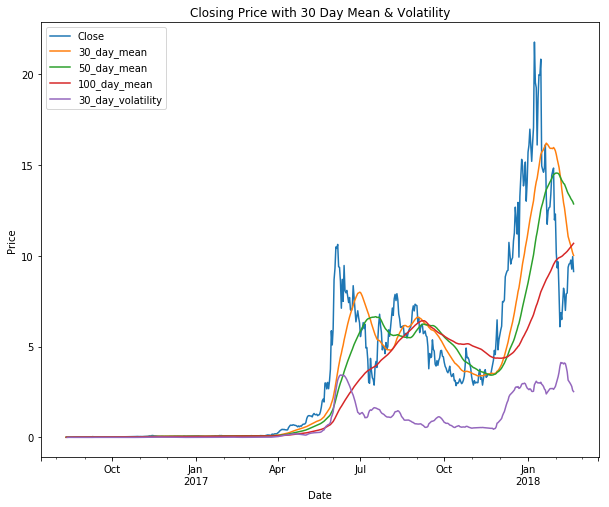

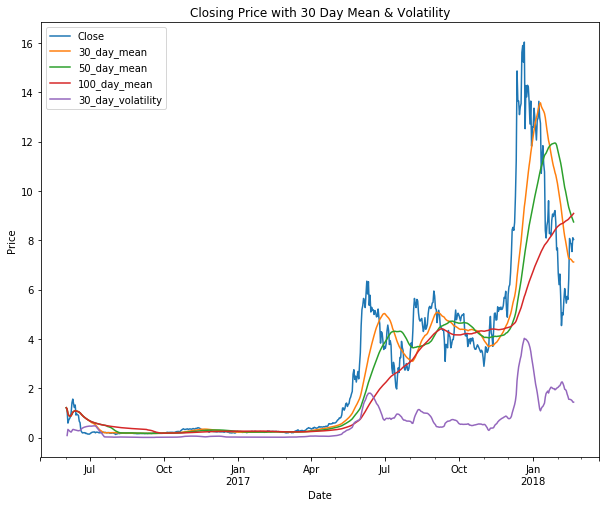

In [11]:
for item in dataset:
  item[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
  plt.title('Closing Price with 30 Day Mean & Volatility')
  plt.ylabel('Price')
  plt.show()

As you can see, we successfully graphed all 15 of them, but note that none of them have the correct titles. You can do this manually by copy and pasting the same code 15 times without using a for-loop (even though it is bad code). If I find a better method in the future as I continue learning Python, I will update this notebook.

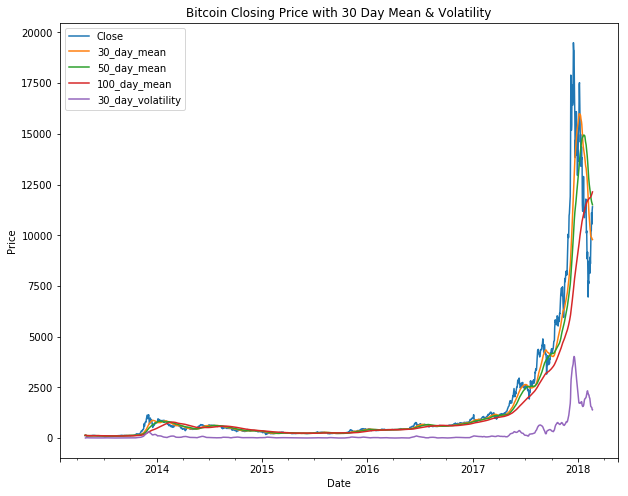

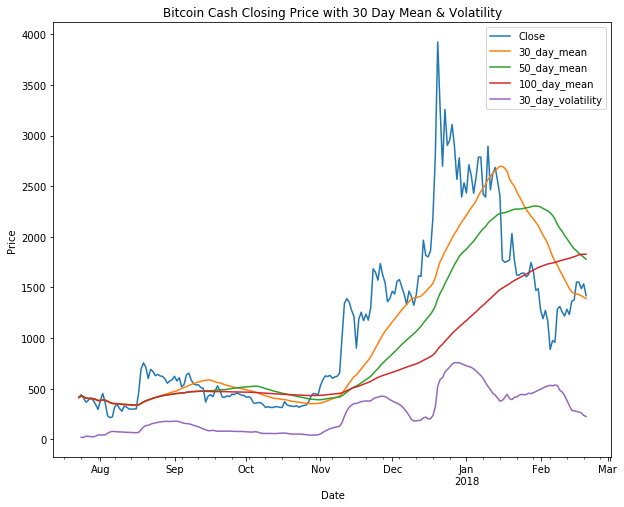

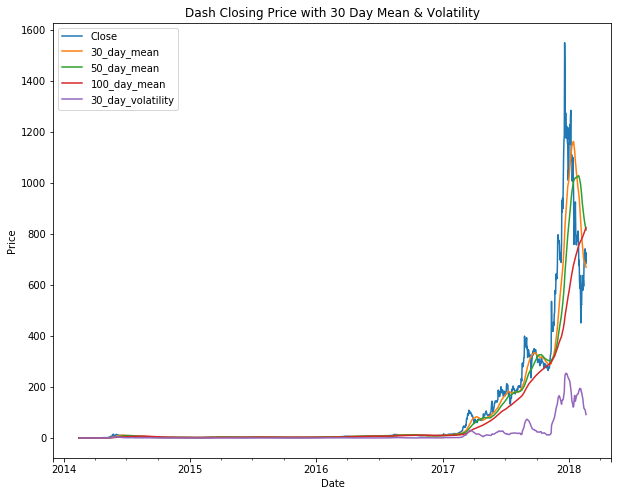

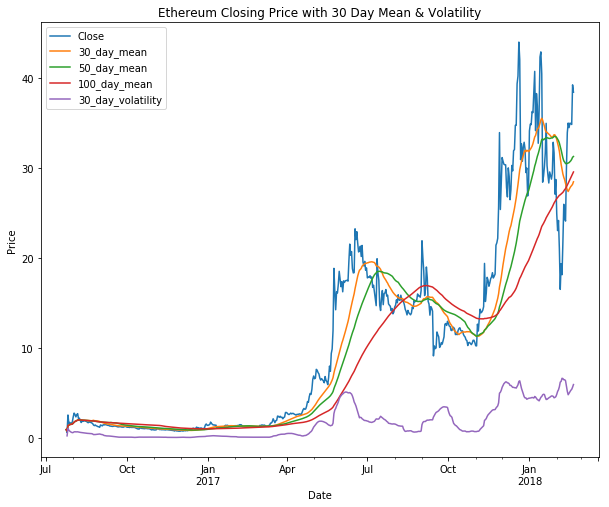

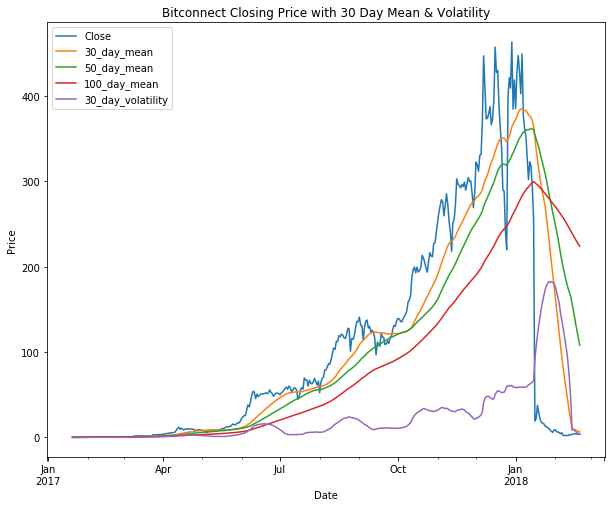

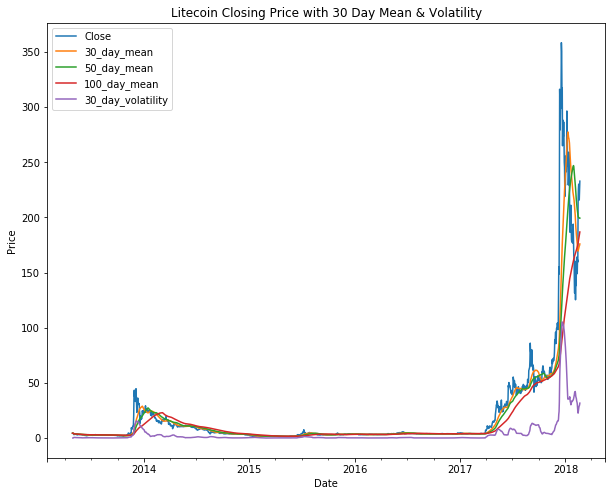

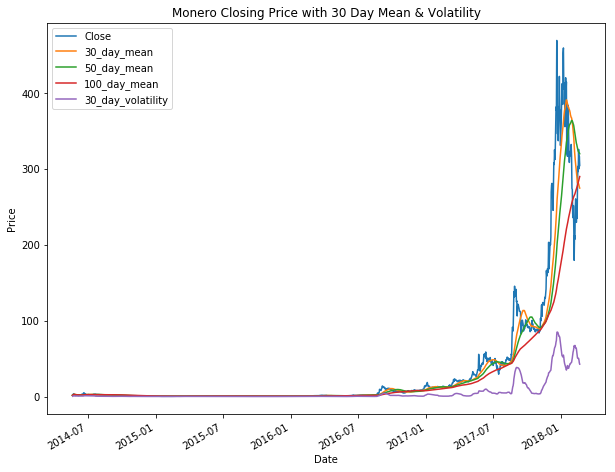

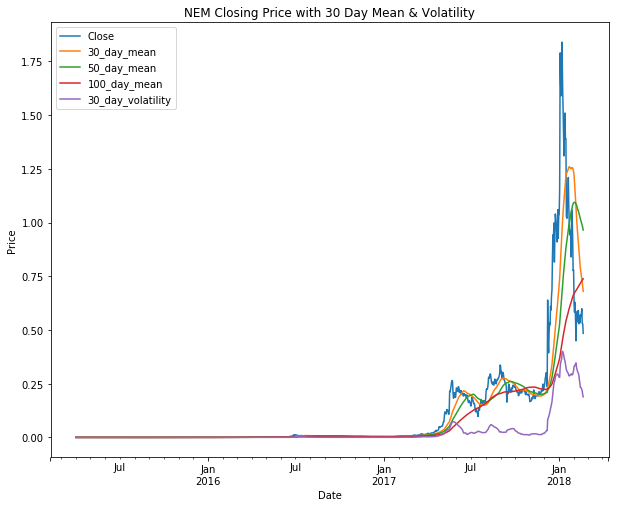

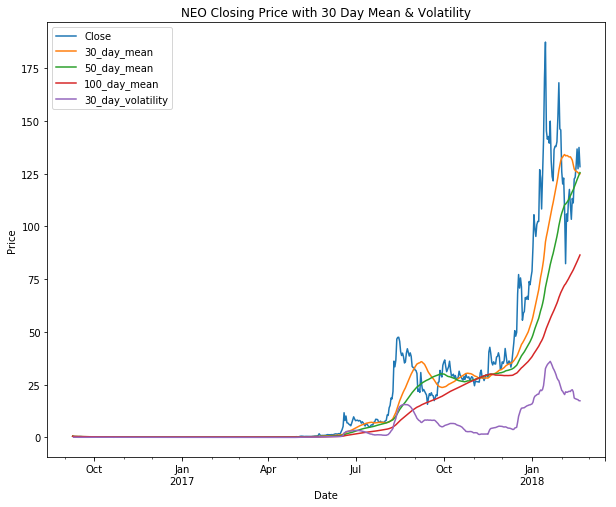

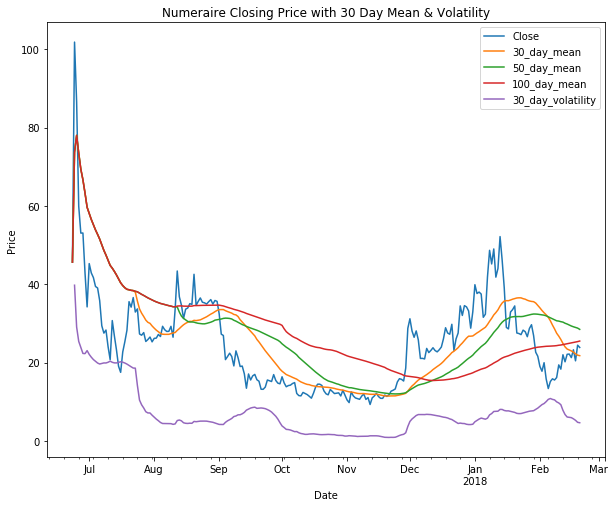

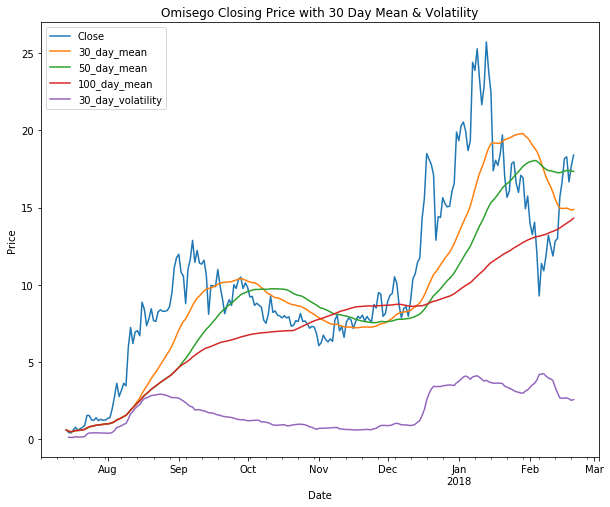

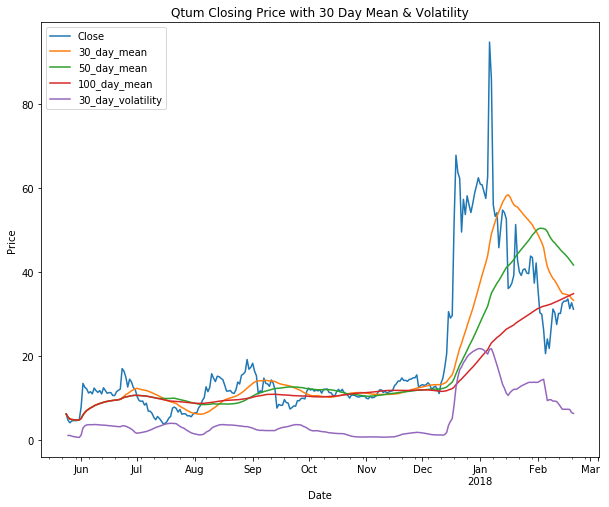

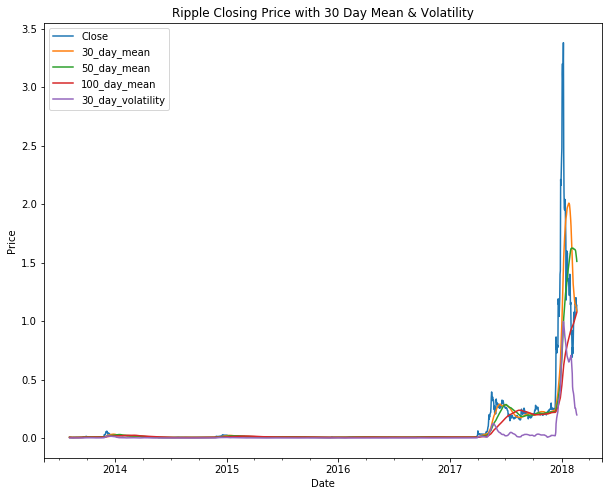

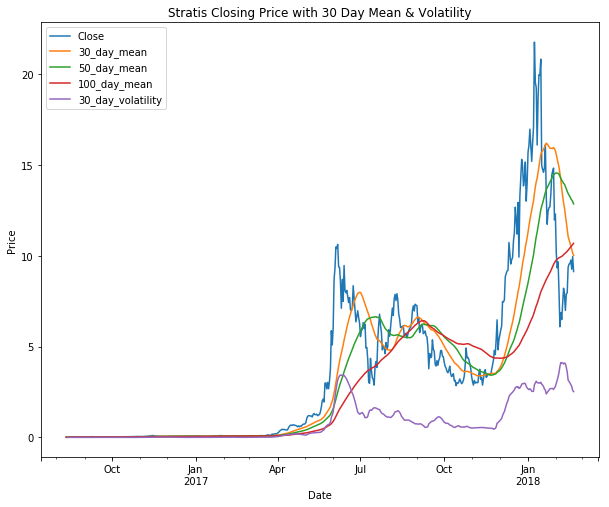

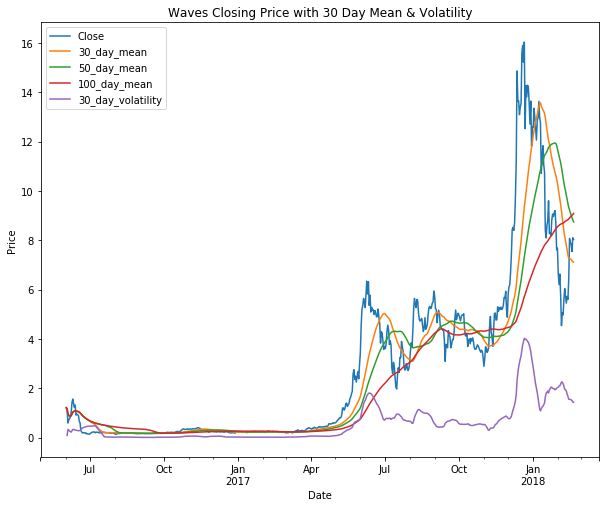

In [12]:
# For the purpose of pretty printing

bitcoin[['Close','30_day_mean', '50_day_mean', '100_day_mean', '30_day_volatility']].plot(figsize=(10,8));
plt.title('Bitcoin Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

bitcoin_cash[['Close','30_day_mean', '50_day_mean', '100_day_mean', '30_day_volatility']].plot(figsize=(10,8));
plt.title('Bitcoin Cash Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

dash[['Close','30_day_mean', '50_day_mean', '100_day_mean', '30_day_volatility']].plot(figsize=(10,8));
plt.title('Dash Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

ethereum_classic[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Ethereum Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

bitconnect[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Bitconnect Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

litecoin[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Litecoin Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

monero[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Monero Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

nem[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('NEM Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

neo[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('NEO Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

numeraire[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Numeraire Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

omisego[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Omisego Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

qtum[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Qtum Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

ripple[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Ripple Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

stratis[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Stratis Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

waves[['Close','30_day_mean', '50_day_mean', '100_day_mean','30_day_volatility']].plot(figsize=(10,8));
plt.title('Waves Closing Price with 30 Day Mean & Volatility')
plt.ylabel('Price')
plt.show()

As a bonus, we will be exploring the "resample" method in pandas, where we can group the data based on the time frequency that we choose. In this example, we will be resampling the data annually. First, we do it by resampling the annual Bitcoin closing price using the mean:

In [13]:
print(bitcoin['Close'].resample('A').mean())

Date
2013-12-31      257.474476
2014-12-31      527.236658
2015-12-31      272.453260
2016-12-31      568.492131
2017-12-31     4006.033644
2018-12-31    11547.133922
Freq: A-DEC, Name: Close, dtype: float64


We can also do it by saying that the closing price of the last day of the year is what we want:

In [14]:
print(bitcoin['Close'].resample('A').apply(lambda x: x[-1]))

Date
2013-12-31      754.01
2014-12-31      320.19
2015-12-31      430.57
2016-12-31      963.74
2017-12-31    14156.40
2018-12-31    11403.70
Freq: A-DEC, Name: Close, dtype: float64


©Regio Ricco Abundan. May 28th, 2018.